# Problématique :
 
Vous marchez vers votre destin quand soudain vous rencontrez deux portes derrière l'une d'entre elles se trouve un trésor mais vous ne savez pas lequel. Il y a un gardien devant chaque porte et les deux savent où se trouve le trésor. L'un des deux gardiens ment toujours tandis que l'autre dit la vérité. Vous ne savez pas lequel ment ou lequel dit la vérité. Les deux gardiens savent lequel ment. Votre défi : posez une seule question à l'un des deux gardiens pour savoir où se trouve le trésor. Vous pouvez appuyer sur pause pour y réfléchir ou écouter la réponse tout de suite. La question que vous devez poser est la suivante : quelle porte l'autre gardien me dirait-il de ne pas ouvrir ?

## Importation des librairies

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

## Création du circuit

##### Nous deuvons un circuit de 3 qubits réprensantant les 2 guardiens et le fait que l'un d'entre eux ment

In [2]:
QC = QuantumCircuit(3, 1)

## Appliquer la porte Hadamard sur le premier qubit (q0)

In [3]:
QC.h(0)

In [4]:
QC.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
q_2: ─────
          
c: 1/═════

## Appliquer la porte CNOT entre q0 (control) et q1 (target)

In [5]:
QC.cx(0, 1)

In [6]:
QC.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
q_2: ──────────
               
c: 1/══════════

## Ajuster un troisième qubit (q2) pour représenter le mensonge

In [7]:
QC.x(2)

In [8]:
QC.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
     ┌───┐└───┘
q_2: ┤ X ├─────
     └───┘     
c: 1/══════════

## Appliquer une porte Hadamard sur le troisième qubit (q2)

In [9]:
QC.h(2)

In [10]:
QC.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
     ┌───┐├───┤
q_2: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════

## Appliquer une porte CNOT entre q1 (control) et q2 (target)

In [11]:
QC.cx(1, 2)

In [12]:
QC.draw()

┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
     ┌───┐├───┤┌─┴─┐
q_2: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘
c: 1/═══════════════

## Appliquer une porte de permutation (SWAP) entre q0 et q1

In [13]:
QC.cx(0, 1)
QC.cx(1, 0)
QC.cx(0, 1)

In [14]:
QC.draw()

┌───┐               ┌───┐     
q_0: ┤ H ├──■─────────■──┤ X ├──■──
     └───┘┌─┴─┐     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ─────┤ X ├──■──┤ X ├──■──┤ X ├
     ┌───┐├───┤┌─┴─┐└───┘     └───┘
q_2: ┤ X ├┤ H ├┤ X ├───────────────
     └───┘└───┘└───┘               
c: 1/══════════════════════════════

## Appliquer une porte NOT (X) sur q0 et q1

In [15]:
QC.x(0)
QC.x(1)

In [16]:
QC.draw()

┌───┐               ┌───┐     ┌───┐
q_0: ┤ H ├──■─────────■──┤ X ├──■──┤ X ├
     └───┘┌─┴─┐     ┌─┴─┐└─┬─┘┌─┴─┐├───┤
q_1: ─────┤ X ├──■──┤ X ├──■──┤ X ├┤ X ├
     ┌───┐├───┤┌─┴─┐└───┘     └───┘└───┘
q_2: ┤ X ├┤ H ├┤ X ├────────────────────
     └───┘└───┘└───┘                    
c: 1/═══════════════════════════════════

## Mesurer q0 pour obtenir le résultat

In [17]:
QC.measure(0, 0)

In [18]:
QC.draw()

┌───┐               ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■─────────■──┤ X ├──■──┤ X ├┤M├
     └───┘┌─┴─┐     ┌─┴─┐└─┬─┘┌─┴─┐├───┤└╥┘
q_1: ─────┤ X ├──■──┤ X ├──■──┤ X ├┤ X ├─╫─
     ┌───┐├───┤┌─┴─┐└───┘     └───┘└───┘ ║ 
q_2: ┤ X ├┤ H ├┤ X ├─────────────────────╫─
     └───┘└───┘└───┘                     ║ 
c: 1/════════════════════════════════════╩═
                                         0

## Simuler le circuit

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(QC, backend=simulator, shots=1024).result()

## Afficher le résultat

In [20]:
counts = result.get_counts(QC)
print(counts)

{'0': 527, '1': 497}


## Tracer l'histogramme des résultats

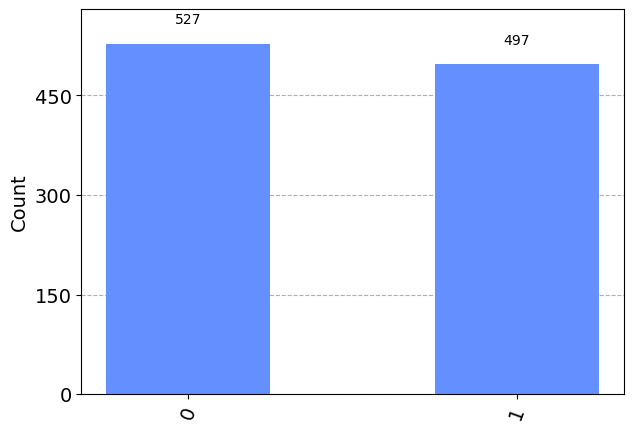

In [21]:
plot_histogram(counts)